In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv(r"C:\Users\Gitanshu\Downloads\Housing.csv")
housing.shape

(545, 13)

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
housing.select_dtypes(include='object').columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
housing['mainroad'] = housing['mainroad'].map({'yes':1, 'no':0})
housing['guestroom'] = housing['guestroom'].map({'yes':1, 'no':0})
housing['basement'] = housing['basement'].map({'yes':1, 'no':0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes':1, 'no':0})
housing['airconditioning'] = housing['airconditioning'].map({'yes':1, 'no':0})
housing['prefarea'] = housing['prefarea'].map({'yes':1, 'no':0})

In [7]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [8]:
housing.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,unfurnished


In [9]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [10]:
housing = pd.concat([housing, status], axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [11]:
housing.drop('furnishingstatus', axis=1, inplace=True)

In [12]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [13]:
housing['areaperbedroom'] = housing.apply(lambda row : row['area']/row['bedrooms'], axis=1)
housing['bbratio'] = housing.apply(lambda row : row['bathrooms']/row['bedrooms'], axis=1)

In [14]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [15]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [17]:
X = housing.drop(["price", "bbratio", "bedrooms", "mainroad", "areaperbedroom", "semi-furnished"], axis=1)
y = housing['price']

In [18]:
print(X.shape)
print(y.shape)

(545, 10)
(545,)


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (436, 10)
Shape of X_test: (109, 10)
Shape of y_train: (436,)
Shape of y_test: (109,)


In [21]:
mms = MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.fit_transform(X_test)

In [22]:
# !pip install statsmodels

In [23]:
import statsmodels.api as sm

In [24]:
const = sm.add_constant(X_train)
lm_1  = sm.OLS(y_train, X_train).fit()

In [25]:
print(lm_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              877.7
Date:                Sun, 07 Apr 2024   Prob (F-statistic):                   4.19e-277
Time:                        11:06:58   Log-Likelihood:                         -6688.4
No. Observations:                 436   AIC:                                  1.340e+04
Df Residuals:                     426   BIC:                                  1.344e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

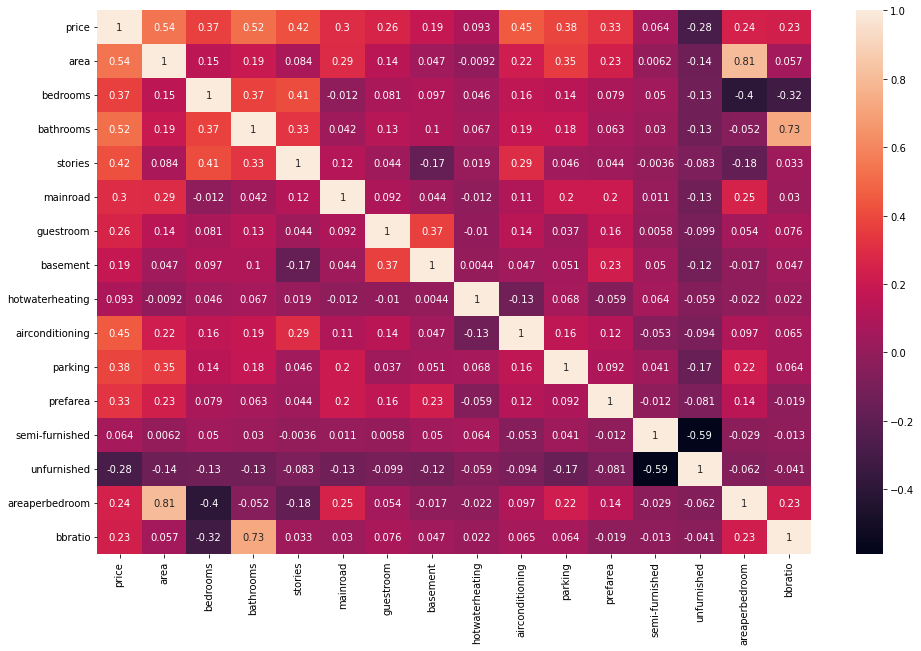

In [27]:
plt.figure(figsize=(16,10))
sns.heatmap(housing.corr(), annot=True)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif

,Features
0,area
1,bathrooms
2,stories
3,guestroom
4,basement
5,hotwaterheating
6,airconditioning
7,parking
8,prefarea
9,unfurnished


In [30]:
vif['Score'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [31]:
vif.sort_values(by='Score', ascending=False)

,Features,Score
1,bathrooms,7.699673
0,area,6.236616
2,stories,5.742271
7,parking,1.962256
4,basement,1.877168
6,airconditioning,1.731858
8,prefarea,1.472390
3,guestroom,1.463292
9,unfurnished,1.392974
5,hotwaterheating,1.089975


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
X_test.shape

(109, 10)

In [34]:
X_train_2 = sm.add_constant(X_train)
lm_2  = sm.OLS(y_train, X_train).fit()
print(lm_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              899.0
Date:                Sun, 07 Apr 2024   Prob (F-statistic):                   3.18e-279
Time:                        11:07:01   Log-Likelihood:                         -6681.5
No. Observations:                 436   AIC:                                  1.338e+04
Df Residuals:                     426   BIC:                                  1.342e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [35]:
X_train.shape

(436, 10)

In [36]:
y_pred = lm_2.predict(X_test)
y_pred

239    3.681829e+06
113    6.196256e+06
325    4.115737e+06
66     7.544666e+06
479    2.978579e+06
           ...     
76     7.394661e+06
132    5.195531e+06
311    4.170787e+06
464    5.054555e+06
155    6.257608e+06
Length: 109, dtype: float64

ValueError: x and y must have same first dimension, but have shapes (164,) and (109,)

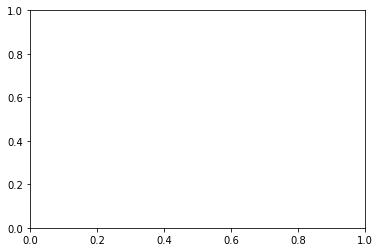

In [37]:
c = [i for i in range(1,165,1)]
fig = plt.figure()

plt.plot(c, y_test, color='blue', linewidth=2.5)
plt.plot(c, y_pred, color='red', linewidth=2.5)
plt.show()